In [13]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import re
import numpy as np

from PIL import Image


In [24]:
stop_words = get_stop_words('es')
extras = ["q", "rt", "día", "orgullo", "internacional", "argentina", "ser"]
stop_words.extend(extras)

In [25]:
df = pd.read_csv("../../../data/orgullo_mentions.txt", names=["words"])

In [26]:
df.head()

,words
0,RT En el Día Internacional del Orgullo LGBTI+ ...
1,Mi pequeño homenaje a este día del
2,RT día del orgullo hetero en Valencia. Se susp...
3,Orgullo?
4,RT - Razones por las que las personas heteros ...


In [27]:
df["words"] = df["words"].str.lower().str.replace("!","").str.replace("¡","")

In [28]:
words = df["words"].str.cat(sep=' ').lower().split(" ")
word_count = Counter(words)

In [29]:
wc_aux = word_count.copy()
for w in wc_aux:
    if w in stop_words:
        del word_count[w]

In [43]:
import random
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    choices = ("rgb(229, 0, 0)" , "rgb(229, 132, 0)" , "rgb(229, 235, 0)" , "rgb(0, 133, 0)", "rgb(0, 0, 203)", "rgb(116, 0, 97)")
    return random.choice(choices)

In [52]:
bigote = np.array(Image.open("../../../data/trooper_alone.png"))

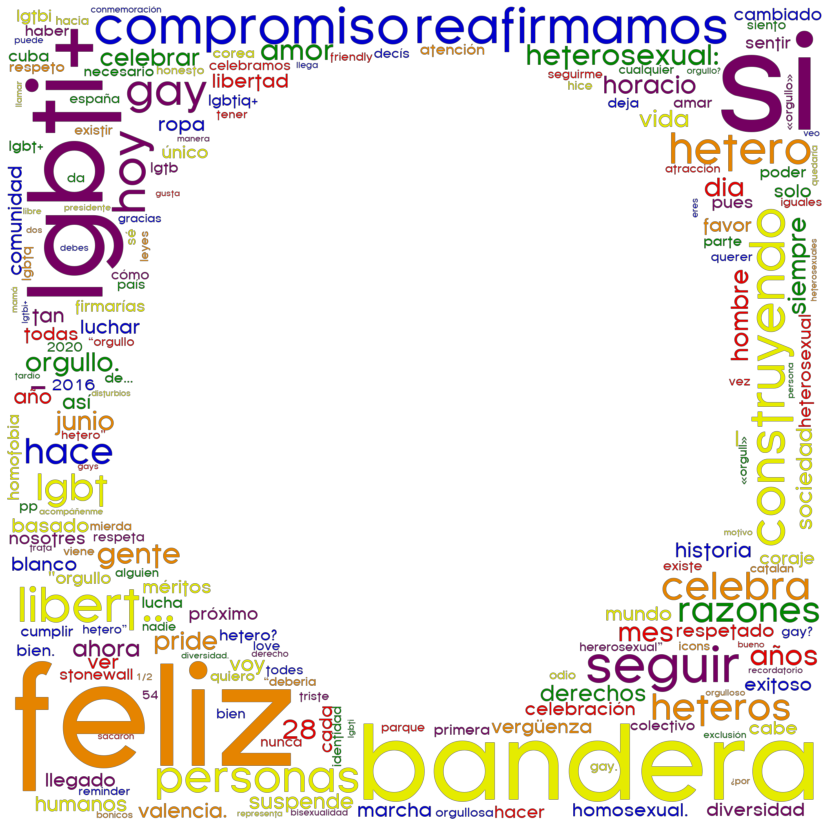

In [53]:
wc = WordCloud(background_color="rgba(0, 0, 0, 0)", mode="RGBA",
               width=1000, 
               height=1500,
               mask=bigote,
               font_path = '../../../styles/Florsn01.ttf').generate_from_frequencies(word_count)

wc.recolor(color_func=white_color_func, random_state=336)

fig = plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'dt_back.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()